#### DO HIGH QUALITY WINES HAVE A HIGH MEDIAN ALCOHOL CONTENT THAN LOW QUALITY WINES?

In [31]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")


In [32]:
#reading the data
df = pd.read_csv("winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
df.loc[(df.quality) > 5, "Rating"] = "High"

In [34]:
df.groupby("Rating").describe()["alcohol"]

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
High,855.0,10.855029,1.106109,8.4,10.0,10.8,11.7,14.0


In [35]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [36]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,NaN
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,NaN
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,NaN
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,NaN


In [37]:
df.loc[(df.quality) <= 5, ["Rating"]] = "Low"
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low


In [38]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Rating                  0
dtype: int64

In [39]:
#subsetting our dataframe to low rating and high rating
low_rating = df.loc[df.Rating == "Low"]["alcohol"]
high_rating = df.loc[df.Rating == "High"]['alcohol']
print(low_rating)
print(high_rating)

0        9.4
1        9.8
2        9.8
4        9.4
5        9.4
        ... 
1582    11.9
1583     9.8
1589     9.2
1594    10.5
1597    10.2
Name: alcohol, Length: 744, dtype: float64
3        9.8
7       10.0
8        9.5
16      10.5
19       9.2
        ... 
1592    11.0
1593     9.5
1595    11.2
1596    11.0
1598    11.0
Name: alcohol, Length: 855, dtype: float64


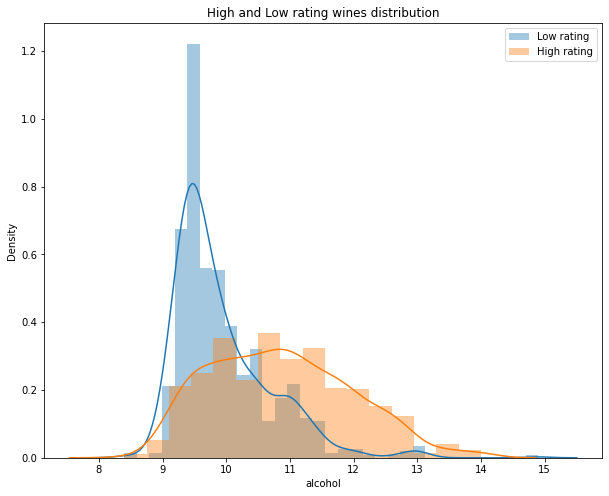

In [40]:
#Testing for normality
fig, ax= plt.subplots(figsize= (10,8))
sns.distplot(low_rating, label="Low rating", ax=ax)
sns.distplot(high_rating, label="High rating", ax=ax)
ax.set_title("High and Low rating wines distribution")
plt.legend();

* from obseravtion they are roughly normally distributed.  we can see the difference in spread between both curves with high rating curve having a higher alcohol content

In [41]:
#testing for variance using bartlett test
#H0 : low quality has a similar variance to high quality
#Ha : There is a difference between variance of high quality and low quality
stats.bartlett(low_rating, high_rating)


BartlettResult(statistic=108.97241772227558, pvalue=1.6455993254217033e-25)

* we reject the null hypothesis and concluding there is a difference between the variance of the low rating and high rating wines

H0 : High quality wine has lower or equal median than Low quality wine  

Ha : High quality wine has higher median than low quality wine

$\alpha$ = 0.05

In [42]:
stats.mannwhitneyu(low_rating, high_rating, alternative="greater")

MannwhitneyuResult(statistic=154807.0, pvalue=1.0)

conclusion: We fail to reject the null hypothesis since we found enough evidence as the p value is > 0.05 hence concluding that high quality wine has lower or equal median than low quality wine. i.e there is no statistical signficant difference between the high quality rating wine and low quality rating wine. 